In [3]:
%pip install tensorflow

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.8.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
    --------------------------------------- 7.9/390.3 MB 37.4 MB/s eta 0:00:11
   - -------------------------------------- 19.1/390.3 MB 46.5 MB/s eta 0:00:08
   --- ----------

In [2]:
import tensorflow as tf
from tensorflow import keras

trainData = keras.utils.image_dataset_from_directory(
    directory = "./train_set_big",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32
)

testData = keras.utils.image_dataset_from_directory(
    directory = "./test_set_big",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32
)

valData = keras.utils.image_dataset_from_directory(
    directory = "./val_set_big",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32
)

def norm(image,label):
    image = tf.cast(image/255, tf.float32)
    return image,label

trainData = trainData.map(norm)
testData = testData.map(norm)
valData = valData.map(norm)

Found 19989 files belonging to 2 classes.
Found 2669 files belonging to 2 classes.
Found 2331 files belonging to 2 classes.


In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, BatchNormalization, Dropout

# Crear la red neuronal
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(12,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(6,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1,activation="sigmoid"))

model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 125, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 125, 125, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 60, 60, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 12)             │       345,612 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365,473 (1.39 MB)

 Trainable params: 365,281 (1.39 MB)

 Non-trainable params: 192 (768.00 B)

In [15]:
# Compilar el modelo
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [16]:
# Entrenar el modelo
history = model.fit(trainData,epochs=10,validation_data=valData)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 799s 1s/step - accuracy: 0.5908 - loss: 0.7171 - val_accuracy: 0.6422 - val_loss: 0.6369
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 786s 1s/step - accuracy: 0.7075 - loss: 0.5560 - val_accuracy: 0.6710 - val_loss: 0.5695
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 787s 1s/step - accuracy: 0.7423 - loss: 0.4993 - val_accuracy: 0.7413 - val_loss: 0.5003
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 784s 1s/step - accuracy: 0.7749 - loss: 0.4545 - val_accuracy: 0.7825 - val_loss: 0.4713
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 799s 1s/step - accuracy: 0.7970 - loss: 0.4145 - val_accuracy: 0.7945 - val_loss: 0.4500
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 782s 1s/step - accuracy: 0.8092 - loss: 0.3728 - val_accuracy: 0.7967 - val_loss: 0.4491
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 780s 1s/step - accuracy: 0.8223 - loss: 0.3446 - val_accuracy: 0.7036 - val_loss: 0.6072
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 782s 1s/step - accuracy: 0.8422 - loss: 0.3051 - val_accu

In [ ]:
# Evaluar el modelo
accuracy = model.evaluate(testData)
print(f'\nPrecision en conjunto de prueba: {accuracy[1]*100:.2f}%')

73/73 ━━━━━━━━━━━━━━━━━━━━ 15s 197ms/step - accuracy: 0.8094 - loss: 0.5765

Precision en conjunto de prueba: 81.17%


In [91]:
#Guardar modelo
model.save('./modeloClasificador.keras')

In [ ]:
#Cargar modelo
model = keras.models.load_model('./modeloClasificador.keras')

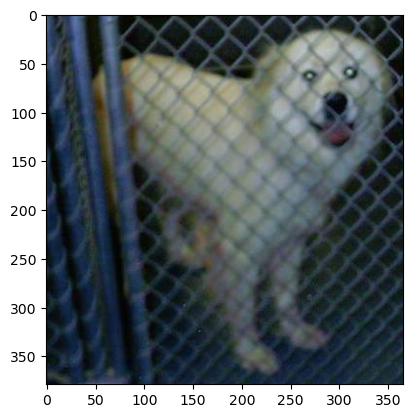

In [89]:
import imageio.v2
import imageio
import matplotlib.pyplot as plt
import numpy as np


img = imageio.v2.imread("./test_set_big/dogs/dog.12113.jpg")

plt.imshow(img)

In [90]:
img = np.resize(img,(256,256,3))
input = img.reshape((1,256,256,3))
output = model.predict(input)

if output < 0.5:
    print("cat")
else:
    print("dog")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
cat
